In [1]:
import numpy as np
import os
import torch
import pandas as pd
from autoencoder import NNAutoencoder
from read_data import read_raw, read_and_perform, train_test_split, scalings
import matplotlib.pyplot as plt

In [2]:
# Leemos los archivos raw
folder = os.path.join('..', 'Date')
dataframes1 = read_raw(folder)
folder = os.path.join('..', 'Date2')
dataframes2 = read_raw(folder)

In [3]:
# Convertimos todo en arrays de numpy con series del mismo largo
data_1 = read_and_perform(dataframes1, row_range=300, col_range=(3,12), split= True)
data_2 = read_and_perform(dataframes2, row_range=99, col_range=(2,5), split= False)
# concatenamos todas las series
data_total = np.vstack([data_1.T, data_2.T])

[+] Se procesaron 297 series de longitud 99
[+] Se procesaron 32 series de longitud 99


In [4]:
# separamos train y test
train, test = train_test_split(data_total)
print(train.shape)
print(test.shape)

(310, 99)
(19, 99)


In [5]:
# escalamos
scaler = scalings(train)
train = scaler.fit_transform(train)
print(f'[+] Train shape {train.shape}')
test = scaler.transform(test) #porque va ael transform???
print(f'[+] Test shape {test.shape}')

[+] StandardScaler entrenado
[+] Train shape (310, 99)
[+] Test shape (19, 99)


In [6]:
# el modelo
autoencoder = NNAutoencoder(99, 2, 0.5)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = 1e-3)
criterio = torch.nn.MSELoss()
# Entrenamiento
hist_train = []
hist_test = []
for e in range(3000):
    autoencoder.train()
    x = torch.FloatTensor(train)
    y_pred = autoencoder(x)
    loss = criterio(y_pred, x)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if e%100 == 0:
        print(e, loss.item())
    hist_train.append(loss.item())
    with torch.no_grad():
        autoencoder.eval()
        x = torch.FloatTensor(test)
        y_pred = autoencoder(x)
        loss = criterio(y_pred, x)
        hist_test.append(loss.item())

0 1.0044233798980713
100 0.1643093228340149
200 0.1286003440618515
300 0.1260833740234375
400 0.11667481064796448
500 0.10897284746170044
600 0.10750191658735275
700 0.10022393614053726
800 0.09950673580169678
900 0.09717004001140594
1000 0.08631034195423126
1100 0.08944202959537506
1200 0.07929961383342743
1300 0.07737255841493607
1400 0.07622312754392624
1500 0.07275420427322388
1600 0.06956151127815247
1700 0.06808848679065704
1800 0.06820671260356903
1900 0.06994768232107162
2000 0.06222181022167206
2100 0.08002849668264389
2200 0.06661221385002136
2300 0.06342468410730362
2400 0.05920872837305069
2500 0.05674386024475098
2600 0.05399032682180405
2700 0.051482778042554855
2800 0.053642433136701584
2900 0.0531209297478199


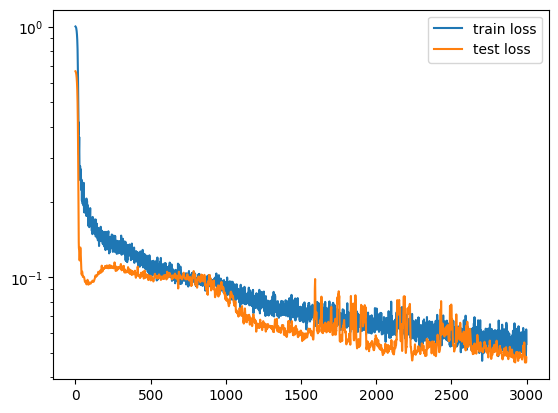

In [7]:
plt.semilogy(hist_train, label = 'train loss')
plt.semilogy(hist_test, label = 'test loss')
plt.legend()
plt.show()

0.8326260553136331


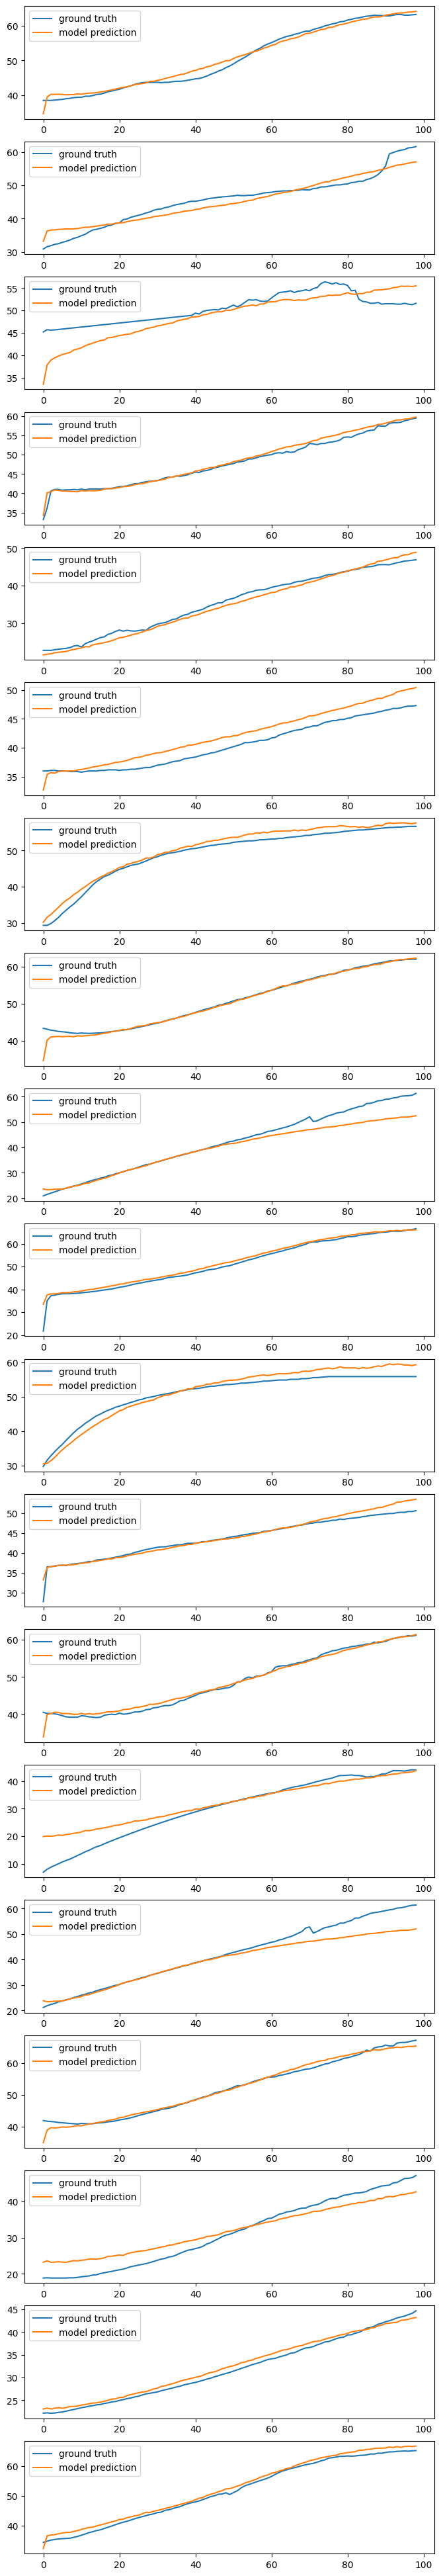

In [8]:
RMSE_list = []
# plot a single sample
with torch.no_grad():
    autoencoder.eval()
    x = torch.FloatTensor(test)
    fig, axs = plt.subplots(19,1, figsize = (8,50))
    for i, col in enumerate(x):
        y_pred = autoencoder(col)
        sample = scaler.inverse_transform(col.reshape(1,99)).reshape(-1)
        sample_pred = scaler.inverse_transform(y_pred.numpy().reshape(1, 99)).reshape(-1)

        RMSE  = np.sqrt(((sample-sample_pred)**2).mean())
        RMSE_list.append(RMSE)
        axs[i].plot(sample, label = 'ground truth')
        axs[i].plot(sample_pred, label = 'model prediction')
        #axs[i].text(10,20, f'RMSE: {RMSE:.3f}  Celsius')
        axs[i].legend()

print(np.array(RMSE_list).min())

In [38]:
latent_list = []
for i, col in enumerate(x):
    latent = autoencoder.encoder(col)
    print(latent.detach().numpy().reshape(-1))

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
